In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import scipy as sp
import seaborn as sns

In [47]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
price_data = pd.read_csv('price.csv')

In [48]:
train_data.dtypes

Customer          int64
Area             object
City Code         int64
Billing Date     object
Product          object
Plant            object
Litres          float64
dtype: object

In [49]:
m = train_data.loc[:,['Area','Litres']].groupby(['Area']).mean()

In [50]:
m

,Litres
Area,
Akdeniz Bölgesi,11639.074745
Doğu Anadolu Bölgesi,13720.433505
Ege Bölgesi,13120.319134
Güneydoğu Anadolu Bölgesi,14149.624302
Karadeniz Bölgesi,12799.962220
Marmara Bölgesi,15299.319045
İç Anadolu Bölgesi,14179.639178


In [51]:
#train_data['AVG'] = train_data['Area'].apply(lambda x : m.loc[x,'Litres'])

In [52]:
#train_data['AVG'].value_counts()

In [53]:
train_data['Area'].value_counts()

Marmara Bölgesi              585965
Ege Bölgesi                  225132
İç Anadolu Bölgesi           212228
Akdeniz Bölgesi              171598
Karadeniz Bölgesi            100001
Güneydoğu Anadolu Bölgesi     54555
Doğu Anadolu Bölgesi          29781
Name: Area, dtype: int64

In [54]:
train_data
train_data['month'] = pd.DatetimeIndex(train_data['Billing Date']).month
train_data['year'] = pd.DatetimeIndex(train_data['Billing Date']).year
train_data['day'] = pd.DatetimeIndex(train_data['Billing Date']).day
train_data.drop('Billing Date',inplace=True,axis=1)
train_data

,Customer,Area,City Code,Product,Plant,Litres,month,year,day
0,10048261,Karadeniz Bölgesi,883,Benzin,T102,0.0,1,2014,1
1,10048261,Karadeniz Bölgesi,883,Benzin,T155,0.0,1,2014,1
2,10048261,Karadeniz Bölgesi,883,Motorin,T102,0.0,1,2014,1
3,10048261,Karadeniz Bölgesi,883,Motorin,T155,0.0,1,2014,1
4,10048261,Karadeniz Bölgesi,883,Motorin,T155,16685.0,1,2014,2
...,...,...,...,...,...,...,...,...,...
1379255,12663344,Doğu Anadolu Bölgesi,218,Motorin,T317,1504.0,12,2018,22
1379256,12663344,Doğu Anadolu Bölgesi,218,Benzin,T317,11111.0,12,2018,28
1379257,12663344,Doğu Anadolu Bölgesi,218,Motorin,T317,22882.0,12,2018,28
1379258,12664221,Marmara Bölgesi,941,Benzin,T102,6528.0,12,2018,29


In [55]:
test_data

,index,Customer,Area,City Code,Product,Week Start Date
0,0,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-07
1,1,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-14
2,2,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-21
3,3,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-28
4,4,10048261,Karadeniz Bölgesi,883,Motorin,2019-02-04
...,...,...,...,...,...,...
108467,108467,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-02
108468,108468,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-09
108469,108469,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-16
108470,108470,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-23


In [56]:
ml = train_data.loc[:,['month','Litres']]

<AxesSubplot: xlabel='month', ylabel='Litres'>

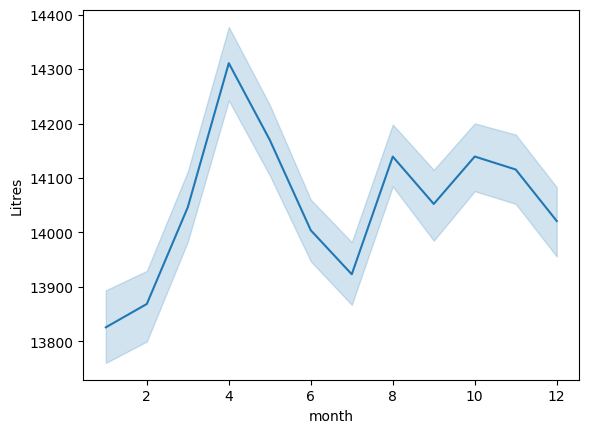

In [57]:
sns.lineplot(
    data=ml,
    x='month',
    y='Litres'
)

In [58]:

numerical_cols =[cname for cname in train_data.columns if train_data[cname].dtype in ['int64','float64']]
categorical_columns = [cname for cname in train_data.columns if train_data[cname].dtype == 'object']

from sklearn.preprocessing import StandardScaler




In [59]:
categorical_columns

['Area', 'Product', 'Plant']

In [60]:
numerical_cols

['Customer', 'City Code', 'Litres', 'month', 'year', 'day']

In [61]:
train_data = train_data.drop_duplicates(ignore_index=True)

X_ = pd.get_dummies(train_data[categorical_columns])

X_  = pd.concat([X_,train_data[numerical_cols]],axis=1)


In [62]:
X_

,Area_Akdeniz Bölgesi,Area_Doğu Anadolu Bölgesi,Area_Ege Bölgesi,Area_Güneydoğu Anadolu Bölgesi,Area_Karadeniz Bölgesi,Area_Marmara Bölgesi,Area_İç Anadolu Bölgesi,Product_Benzin,Product_Motorin,Plant_T101,...,Plant_T317,Plant_T318,Plant_T327,Plant_T329,Customer,City Code,Litres,month,year,day
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,10048261,883,0.0,1,2014,1
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,10048261,883,0.0,1,2014,1
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,10048261,883,0.0,1,2014,1
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,10048261,883,0.0,1,2014,1
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,10048261,883,16685.0,1,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379255,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,12663344,218,1504.0,12,2018,22
1379256,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,12663344,218,11111.0,12,2018,28
1379257,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,12663344,218,22882.0,12,2018,28
1379258,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,12664221,941,6528.0,12,2018,29


In [63]:
X_.columns

Index(['Area_Akdeniz Bölgesi', 'Area_Doğu Anadolu Bölgesi', 'Area_Ege Bölgesi',
       'Area_Güneydoğu Anadolu Bölgesi', 'Area_Karadeniz Bölgesi',
       'Area_Marmara Bölgesi', 'Area_İç Anadolu Bölgesi', 'Product_Benzin',
       'Product_Motorin', 'Plant_T101', 'Plant_T102', 'Plant_T105',
       'Plant_T107', 'Plant_T108', 'Plant_T110', 'Plant_T111', 'Plant_T112',
       'Plant_T113', 'Plant_T120', 'Plant_T155', 'Plant_T248', 'Plant_T314',
       'Plant_T317', 'Plant_T318', 'Plant_T327', 'Plant_T329', 'Customer',
       'City Code', 'Litres', 'month', 'year', 'day'],
      dtype='object')

In [64]:
y = X_.Litres
X_ = X_.drop('Litres',axis=1)



In [65]:
X = StandardScaler().fit_transform(X_)

In [66]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,n_jobs=-1,verbose=2)

model.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100building tree 26 of 100



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.0s


building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestRegressor(n_jobs=-1, verbose=2)

In [67]:
from sklearn.metrics import mean_squared_log_error
preds = model.predict(X)
print('smle score before secelting top 10 columns . ',mean_squared_log_error(preds,y))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.5s


smle score before secelting top 10 columns .  1.6483428489101686


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    3.5s finished


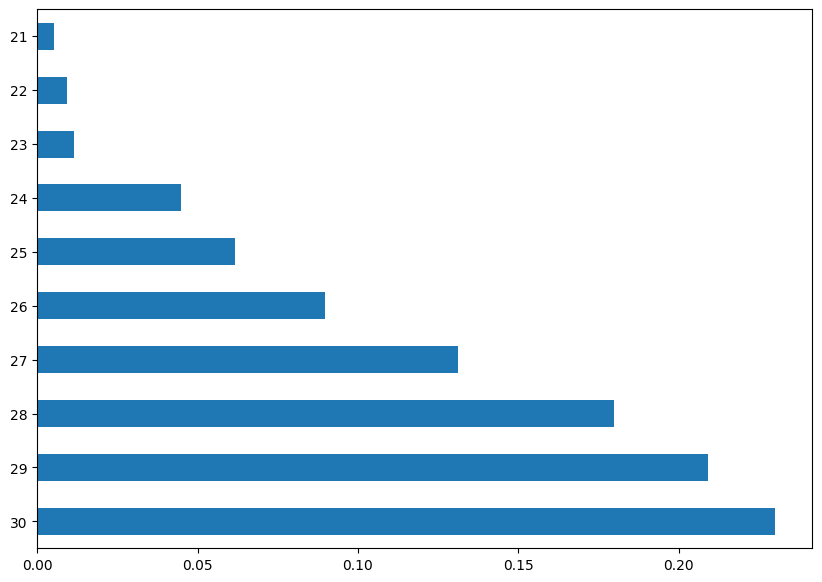

In [68]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(np.sort(model.feature_importances_))
feat_importances.nlargest(10).plot(kind='barh');

### as we can see from above: most important column is 31th colm so i want to take best 10 columns

In [69]:
sliced = X_.iloc[:,21:31]
X_ = sliced

In [70]:
price_data.dtypes

City Code      int64
Validfrom     object
Product       object
CRP          float64
dtype: object

In [71]:
price_data.isna().sum()

City Code    0
Validfrom    0
Product      0
CRP          0
dtype: int64

In [72]:
price_data['Validfrom']

0         2016-07-27
1         2016-07-28
2         2016-07-29
3         2016-07-30
4         2016-07-31
             ...    
311739    2019-12-27
311740    2019-12-28
311741    2019-12-29
311742    2019-12-30
311743    2019-12-31
Name: Validfrom, Length: 311744, dtype: object

In [73]:
price_data['Product'] = price_data['Product'].astype('str')

In [74]:
price_data['Product'].value_counts()

Benzin     155872
Motorin    155872
Name: Product, dtype: int64

In [75]:
price_data['City Code'].nunique()
grouped = price_data.loc[:,['CRP','City Code']].groupby('City Code').mean()

grouped

,CRP
City Code,
116,5.779724
125,5.096658
126,5.071732
150,5.122436
172,5.234619
...,...
957,5.159452
966,5.118116
976,5.119979


In [76]:
located = train_data.loc[:,'City Code']

a = pd.merge(left=located,right=grouped,on='City Code')
a

,City Code,CRP
0,883,5.145950
1,883,5.145950
2,883,5.145950
3,883,5.145950
4,883,5.145950
...,...,...
1378099,518,6.706506
1378100,518,6.706506
1378101,518,6.706506
1378102,518,6.706506


In [77]:
train_data

,Customer,Area,City Code,Product,Plant,Litres,month,year,day
0,10048261,Karadeniz Bölgesi,883,Benzin,T102,0.0,1,2014,1
1,10048261,Karadeniz Bölgesi,883,Benzin,T155,0.0,1,2014,1
2,10048261,Karadeniz Bölgesi,883,Motorin,T102,0.0,1,2014,1
3,10048261,Karadeniz Bölgesi,883,Motorin,T155,0.0,1,2014,1
4,10048261,Karadeniz Bölgesi,883,Motorin,T155,16685.0,1,2014,2
...,...,...,...,...,...,...,...,...,...
1379255,12663344,Doğu Anadolu Bölgesi,218,Motorin,T317,1504.0,12,2018,22
1379256,12663344,Doğu Anadolu Bölgesi,218,Benzin,T317,11111.0,12,2018,28
1379257,12663344,Doğu Anadolu Bölgesi,218,Motorin,T317,22882.0,12,2018,28
1379258,12664221,Marmara Bölgesi,941,Benzin,T102,6528.0,12,2018,29


In [78]:
test_data = test_data.iloc[:,1:]

In [79]:
test_data

,Customer,Area,City Code,Product,Week Start Date
0,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-07
1,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-14
2,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-21
3,10048261,Karadeniz Bölgesi,883,Motorin,2019-01-28
4,10048261,Karadeniz Bölgesi,883,Motorin,2019-02-04
...,...,...,...,...,...
108467,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-02
108468,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-09
108469,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-16
108470,12739737,Doğu Anadolu Bölgesi,194,Benzin,2019-12-23


In [80]:
test_data['Month'] = pd.DatetimeIndex(test_data['Week Start Date']).month
test_data['Year'] = pd.DatetimeIndex(test_data['Week Start Date']).year
test_data['Day'] = pd.DatetimeIndex(test_data['Week Start Date']).day

test_data.drop(['Week Start Date'],axis=1,inplace=True)

In [81]:
test_data

,Customer,Area,City Code,Product,Month,Year,Day
0,10048261,Karadeniz Bölgesi,883,Motorin,1,2019,7
1,10048261,Karadeniz Bölgesi,883,Motorin,1,2019,14
2,10048261,Karadeniz Bölgesi,883,Motorin,1,2019,21
3,10048261,Karadeniz Bölgesi,883,Motorin,1,2019,28
4,10048261,Karadeniz Bölgesi,883,Motorin,2,2019,4
...,...,...,...,...,...,...,...
108467,12739737,Doğu Anadolu Bölgesi,194,Benzin,12,2019,2
108468,12739737,Doğu Anadolu Bölgesi,194,Benzin,12,2019,9
108469,12739737,Doğu Anadolu Bölgesi,194,Benzin,12,2019,16
108470,12739737,Doğu Anadolu Bölgesi,194,Benzin,12,2019,23


In [82]:
X_

,Plant_T314,Plant_T317,Plant_T318,Plant_T327,Plant_T329,Customer,City Code,month,year,day
0,0,0,0,0,0,10048261,883,1,2014,1
1,0,0,0,0,0,10048261,883,1,2014,1
2,0,0,0,0,0,10048261,883,1,2014,1
3,0,0,0,0,0,10048261,883,1,2014,1
4,0,0,0,0,0,10048261,883,1,2014,2
...,...,...,...,...,...,...,...,...,...,...
1379255,0,1,0,0,0,12663344,218,12,2018,22
1379256,0,1,0,0,0,12663344,218,12,2018,28
1379257,0,1,0,0,0,12663344,218,12,2018,28
1379258,0,0,0,0,0,12664221,941,12,2018,29


In [83]:
train_data

,Customer,Area,City Code,Product,Plant,Litres,month,year,day
0,10048261,Karadeniz Bölgesi,883,Benzin,T102,0.0,1,2014,1
1,10048261,Karadeniz Bölgesi,883,Benzin,T155,0.0,1,2014,1
2,10048261,Karadeniz Bölgesi,883,Motorin,T102,0.0,1,2014,1
3,10048261,Karadeniz Bölgesi,883,Motorin,T155,0.0,1,2014,1
4,10048261,Karadeniz Bölgesi,883,Motorin,T155,16685.0,1,2014,2
...,...,...,...,...,...,...,...,...,...
1379255,12663344,Doğu Anadolu Bölgesi,218,Motorin,T317,1504.0,12,2018,22
1379256,12663344,Doğu Anadolu Bölgesi,218,Benzin,T317,11111.0,12,2018,28
1379257,12663344,Doğu Anadolu Bölgesi,218,Motorin,T317,22882.0,12,2018,28
1379258,12664221,Marmara Bölgesi,941,Benzin,T102,6528.0,12,2018,29


In [84]:
price_data

,City Code,Validfrom,Product,CRP
0,116,2016-07-27,Benzin,4.46
1,116,2016-07-28,Benzin,4.46
2,116,2016-07-29,Benzin,4.46
3,116,2016-07-30,Benzin,4.40
4,116,2016-07-31,Benzin,4.40
...,...,...,...,...
311739,990,2019-12-27,Motorin,6.74
311740,990,2019-12-28,Motorin,6.74
311741,990,2019-12-29,Motorin,6.74
311742,990,2019-12-30,Motorin,6.74


In [85]:
from sklearn.decomposition import PCA

pcafunc = PCA(n_components=1)
a = pcafunc.fit_transform(a)

In [86]:
a = pd.DataFrame(a, columns=['col_pca'])

In [87]:
a

,col_pca
0,-184.580340
1,-184.580340
2,-184.580340
3,-184.580340
4,-184.580340
...,...
1378099,180.419732
1378100,180.419732
1378101,180.419732
1378102,180.419732


In [88]:
X_ = pd.merge(left=X_,right = a,left_index=True, right_index=True)

In [89]:
X_

,Plant_T314,Plant_T317,Plant_T318,Plant_T327,Plant_T329,Customer,City Code,month,year,day,col_pca
0,0,0,0,0,0,10048261,883,1,2014,1,-184.580340
1,0,0,0,0,0,10048261,883,1,2014,1,-184.580340
2,0,0,0,0,0,10048261,883,1,2014,1,-184.580340
3,0,0,0,0,0,10048261,883,1,2014,1,-184.580340
4,0,0,0,0,0,10048261,883,1,2014,2,-184.580340
...,...,...,...,...,...,...,...,...,...,...,...
1378099,0,0,0,0,0,12629671,835,3,2018,30,180.419732
1378100,0,0,0,0,0,12629671,835,3,2018,31,180.419732
1378101,0,0,0,0,0,12629671,835,3,2018,31,180.419732
1378102,0,0,0,0,0,12629671,835,4,2018,4,180.419732


In [91]:
comb = pd.concat([X_,y],axis=1)
comb = comb.dropna(how='any',axis=0)

y = comb.Litres

X_ = comb.drop('Litres',axis=1)

model.fit(X_,y)
y_preds = model.predict(X_)
print('ean aquared log error of the model is given right there :',mean_squared_log_error(y_preds,y) )

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.5s


building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.3s


ean aquared log error of the model is given right there : 1.927130134408015


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    2.6s finished
